In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from fpgrowth_py import fpgrowth
import time

In [116]:
data = pd.read_csv('../common/Market_Basket_Optimisation.csv', sep = ',')

In [151]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   shrimp             7500 non-null   object 
 1   almonds            5746 non-null   object 
 2   avocado            4388 non-null   object 
 3   vegetables mix     3344 non-null   object 
 4   green grapes       2528 non-null   object 
 5   whole weat flour   1863 non-null   object 
 6   yams               1368 non-null   object 
 7   cottage cheese     980 non-null    object 
 8   energy drink       653 non-null    object 
 9   tomato juice       394 non-null    object 
 10  low fat yogurt     255 non-null    object 
 11  green tea          153 non-null    object 
 12  honey              86 non-null     object 
 13  salad              46 non-null     object 
 14  mineral water      24 non-null     object 
 15  salmon             7 non-null      object 
 16  antioxydant juice  3 non

In [119]:
data.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [120]:
data.stack().value_counts()

mineral water    1787
eggs             1348
spaghetti        1306
french fries     1282
chocolate        1230
                 ... 
bramble            14
cream               7
napkins             5
water spray         3
 asparagus          1
Length: 120, dtype: int64

In [121]:
data.stack().value_counts(normalize=True)

mineral water    0.060900
eggs             0.045939
spaghetti        0.044508
french fries     0.043690
chocolate        0.041918
                   ...   
bramble          0.000477
cream            0.000239
napkins          0.000170
water spray      0.000102
 asparagus       0.000034
Length: 120, dtype: float64

<Axes: >

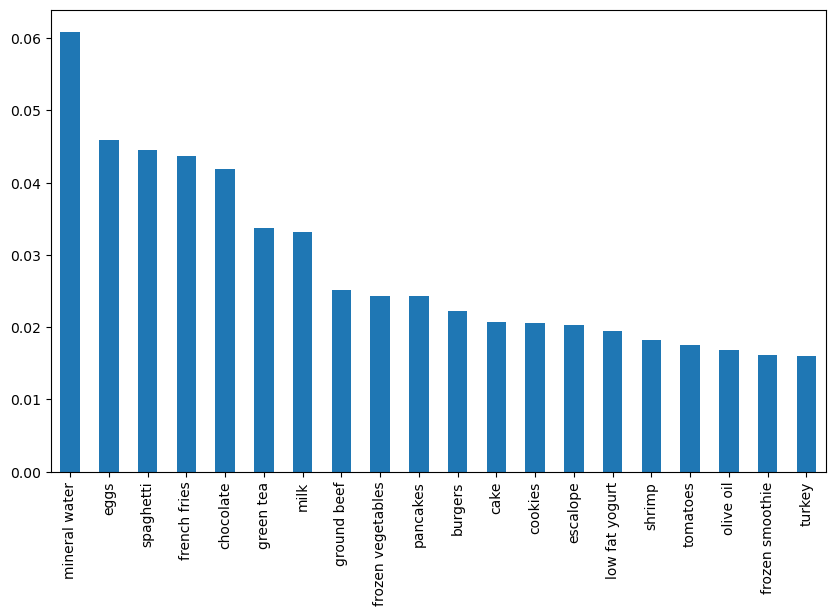

In [122]:
data.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

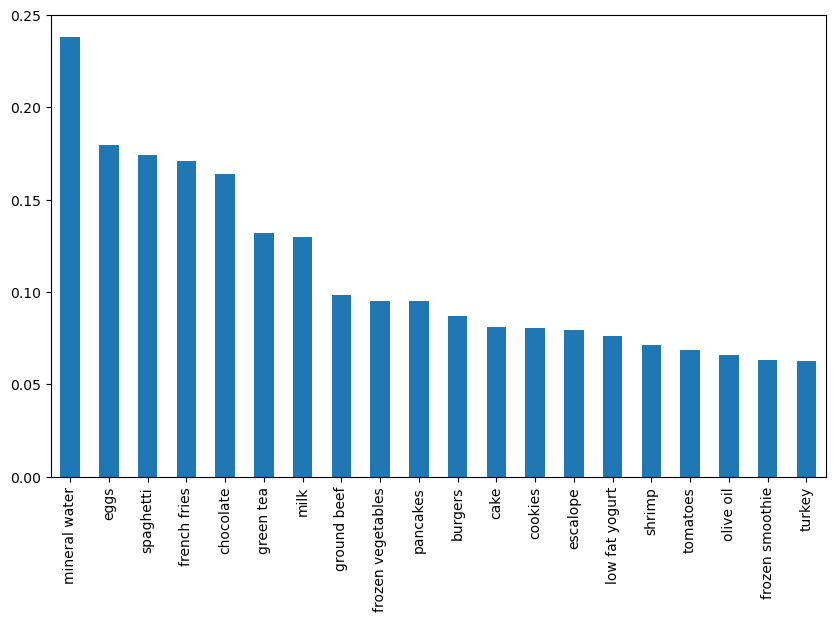

In [123]:
data.stack().value_counts().head(20).apply(lambda item: item / data.shape[0]).plot(kind='bar')

In [124]:
transactions = []
for i in range(data.shape[0]):
    row = data.iloc[i].dropna().tolist()
    transactions.append(row)

In [125]:
transactions[0][0]

'burgers'

In [126]:
transactions[0]

['burgers', 'meatballs', 'eggs']

In [156]:
from apriori_python import apriori

times=[]
start_time = time.time()

t1, rules = apriori(transactions,minSup=0.04, minConf=0.17)

time1 = time.time() - start_time

times.append(time1)

In [157]:
rules

[[{'mineral water'}, {'ground beef'}, 0.17179630665920537],
 [{'mineral water'}, {'milk'}, 0.20145495243424735],
 [{'mineral water'}, {'eggs'}, 0.21376608841634023],
 [{'mineral water'}, {'chocolate'}, 0.22104085058757694],
 [{'mineral water'}, {'spaghetti'}, 0.2506994963626189],
 [{'eggs'}, {'mineral water'}, 0.28338278931750743],
 [{'chocolate'}, {'mineral water'}, 0.3213995117982099],
 [{'spaghetti'}, {'mineral water'}, 0.3430321592649311],
 [{'milk'}, {'mineral water'}, 0.37037037037037035],
 [{'ground beef'}, {'mineral water'}, 0.41655359565807326]]

In [158]:
from apyori import apriori

start_time = time.time()

rules = apriori(transactions=transactions,
                min_support=0.04, 
                min_confidence=0.17,
                min_lift=1.0001)

results = list(rules)

time2 = time.time() - start_time

times.append(time2)

In [159]:
for res in results:
    for subset in res[2]:
        print(subset[0], subset[1])
        print("Suppot: {0}; Confidense {1}; Lift: {2}".format(res[1],subset[2], subset[3]))
        print()

frozenset({'chocolate'}) frozenset({'mineral water'})
Suppot: 0.05266666666666667; Confidense 0.32139951179820997; Lift: 1.3489067367020564

frozenset({'mineral water'}) frozenset({'chocolate'})
Suppot: 0.05266666666666667; Confidense 0.22104085058757697; Lift: 1.3489067367020564

frozenset({'eggs'}) frozenset({'mineral water'})
Suppot: 0.05093333333333333; Confidense 0.28338278931750743; Lift: 1.1893513821383916

frozenset({'mineral water'}) frozenset({'eggs'})
Suppot: 0.05093333333333333; Confidense 0.21376608841634023; Lift: 1.1893513821383916

frozenset({'ground beef'}) frozenset({'mineral water'})
Suppot: 0.040933333333333335; Confidense 0.41655359565807326; Lift: 1.7482663499919135

frozenset({'mineral water'}) frozenset({'ground beef'})
Suppot: 0.040933333333333335; Confidense 0.1717963066592054; Lift: 1.7482663499919138

frozenset({'milk'}) frozenset({'mineral water'})
Suppot: 0.048; Confidense 0.3703703703703704; Lift: 1.5544363613753656

frozenset({'mineral water'}) frozenset

In [131]:
from efficient_apriori import apriori

start_time = time.time()

itemset, rules = apriori(transactions, min_support=0.04, min_confidence=0.17)

time3 = time.time() - start_time

times.append(time3)

In [132]:
for i in range(len(rules)):
    print(rules[i])

{mineral water} -> {chocolate} (conf: 0.221, supp: 0.053, lift: 1.349, conv: 1.073)
{chocolate} -> {mineral water} (conf: 0.321, supp: 0.053, lift: 1.349, conv: 1.123)
{mineral water} -> {eggs} (conf: 0.214, supp: 0.051, lift: 1.189, conv: 1.043)
{eggs} -> {mineral water} (conf: 0.283, supp: 0.051, lift: 1.189, conv: 1.063)
{mineral water} -> {ground beef} (conf: 0.172, supp: 0.041, lift: 1.748, conv: 1.089)
{ground beef} -> {mineral water} (conf: 0.417, supp: 0.041, lift: 1.748, conv: 1.306)
{mineral water} -> {milk} (conf: 0.201, supp: 0.048, lift: 1.554, conv: 1.090)
{milk} -> {mineral water} (conf: 0.370, supp: 0.048, lift: 1.554, conv: 1.210)
{spaghetti} -> {mineral water} (conf: 0.343, supp: 0.060, lift: 1.440, conv: 1.159)
{mineral water} -> {spaghetti} (conf: 0.251, supp: 0.060, lift: 1.440, conv: 1.102)


In [133]:
start_time = time.time()

itemset, rules = fpgrowth(transactions, minSupRatio=0.04, minConf=0.17)

time4 = time.time() - start_time

times.append(time4)

In [134]:
for i in range(len(rules)):
    print(rules[i])

[{'mineral water'}, {'ground beef'}, 0.17179630665920537]
[{'ground beef'}, {'mineral water'}, 0.41655359565807326]
[{'mineral water'}, {'milk'}, 0.20145495243424735]
[{'milk'}, {'mineral water'}, 0.37037037037037035]
[{'mineral water'}, {'chocolate'}, 0.22104085058757694]
[{'chocolate'}, {'mineral water'}, 0.3213995117982099]
[{'mineral water'}, {'spaghetti'}, 0.2506994963626189]
[{'spaghetti'}, {'mineral water'}, 0.3430321592649311]
[{'eggs'}, {'mineral water'}, 0.28338278931750743]
[{'mineral water'}, {'eggs'}, 0.21376608841634023]


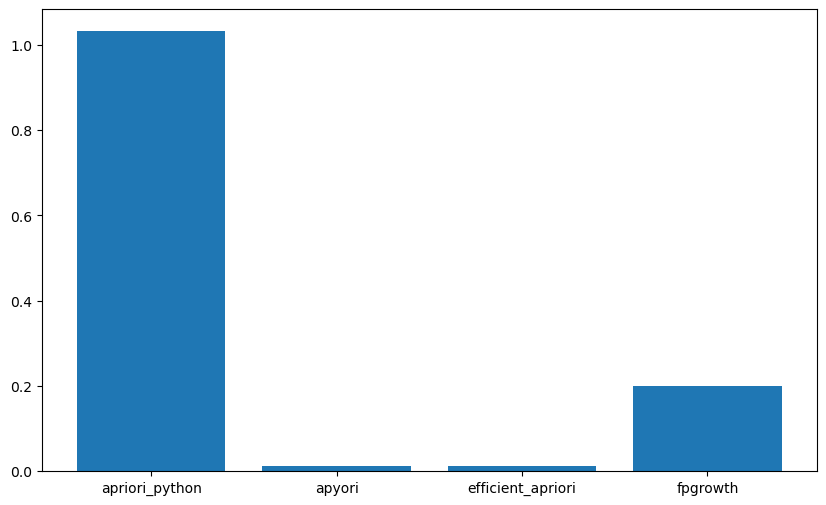

In [136]:
plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth'], times)
plt.show()

In [137]:
data1 = pd.read_csv('../common/data.csv', sep = ',')

In [160]:
data1.head()

,Bread,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Scandinavian,Scandinavian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Hot chocolate,Jam,Cookies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Coffee,Pastry,Bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Medialuna,Pastry,Muffin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9530 entries, 0 to 9529
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Bread        9207 non-null   object
 1   Unnamed: 1   5840 non-null   object
 2   Unnamed: 2   2959 non-null   object
 3   Unnamed: 3   1505 non-null   object
 4   Unnamed: 4   596 non-null    object
 5   Unnamed: 5   245 non-null    object
 6   Unnamed: 6   91 non-null     object
 7   Unnamed: 7   36 non-null     object
 8   Unnamed: 8   13 non-null     object
 9   Unnamed: 9   9 non-null      object
 10  Unnamed: 10  4 non-null      object
 11  Unnamed: 11  1 non-null      object
dtypes: object(12)
memory usage: 893.6+ KB


In [140]:
data1.stack().value_counts()

Coffee              5471
Bread               3324
Tea                 1435
Cake                1025
Pastry               856
                    ... 
Olum & polenta         1
Gift voucher           1
Coffee granules        1
Raw bars               1
Chicken sand           1
Length: 102, dtype: int64

In [141]:
data1.stack().value_counts(normalize=True)

Coffee              0.266800
Bread               0.162099
Tea                 0.069980
Cake                0.049985
Pastry              0.041744
                      ...   
Olum & polenta      0.000049
Gift voucher        0.000049
Coffee granules     0.000049
Raw bars            0.000049
Chicken sand        0.000049
Length: 102, dtype: float64

<Axes: >

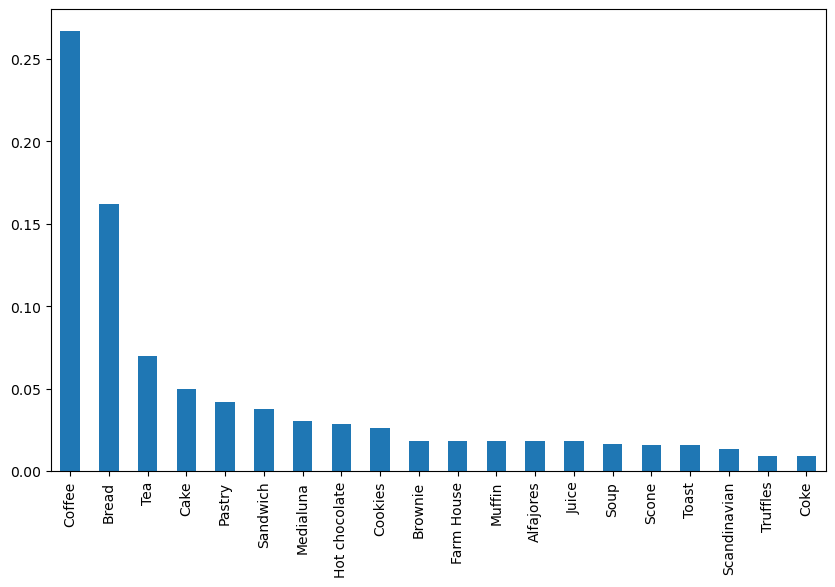

In [142]:
data1.stack().value_counts(normalize=True).head(20).plot(kind='bar')

<Axes: >

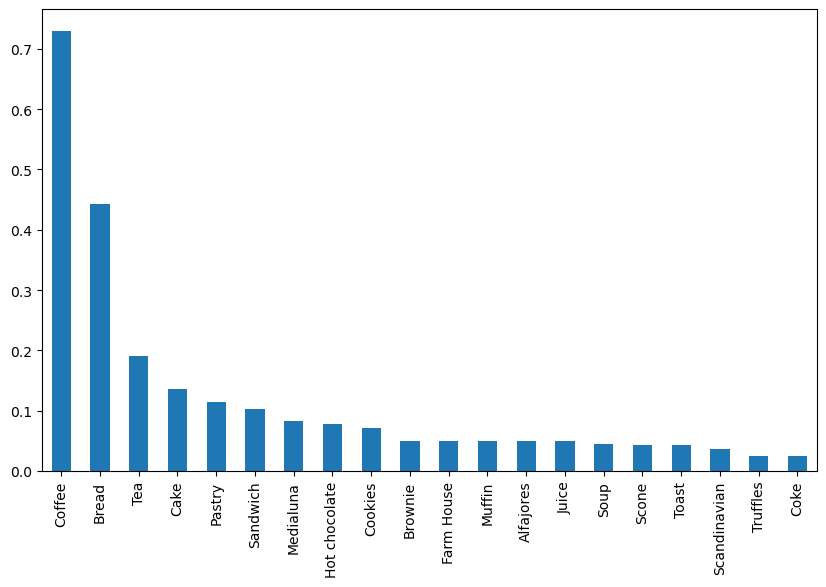

In [143]:
data1.stack().value_counts().head(20).apply(lambda item: item / data.shape[0]).plot(kind='bar')

In [144]:
data1.shape

(9530, 12)

In [145]:
transactions1 = []
for i in range(data1.shape[0]):
    row = data1.iloc[i].dropna().tolist()
    transactions1.append(row)

In [146]:
from apriori_python import apriori

times1=[]
start_time = time.time()

t1, rules = apriori(transactions1,minSup=0.025, minConf=0.19)

time1 = time.time() - start_time

times1.append(time1)
rules

[[{'Tea'}, {'Bread'}, 0.19703703703703704],
 [{'Bread'}, {'Coffee'}, 0.2751937984496124],
 [{'Pastry'}, {'Bread'}, 0.33865030674846625],
 [{'Tea'}, {'Coffee'}, 0.3496296296296296],
 [{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942],
 [{'Cookies'}, {'Coffee'}, 0.5184466019417475],
 [{'Cake'}, {'Coffee'}, 0.5269582909460834],
 [{'Sandwich'}, {'Coffee'}, 0.5323529411764706],
 [{'Pastry'}, {'Coffee'}, 0.5521472392638037],
 [{'Medialuna'}, {'Coffee'}, 0.5692307692307692]]

In [162]:
from apyori import apriori

start_time = time.time()

rules = apriori(transactions=transactions1,
                min_support=0.02, 
                min_confidence=0.19,
                min_lift=1.0001)

results = list(rules)

time2 = time.time() - start_time

times1.append(time2)

for res in results:
    for subset in res[2]:
        print(subset[0], subset[1])
        print("Suppot: {0}; Confidense {1}; Lift: {2}".format(res[1],subset[2], subset[3]))
        print()

frozenset({'Pastry'}) frozenset({'Bread'})
Suppot: 0.028961175236096537; Confidense 0.33865030674846625; Lift: 1.0424216483568745

frozenset({'Cake'}) frozenset({'Coffee'})
Suppot: 0.05435466946484785; Confidense 0.5269582909460834; Lift: 1.109079618532724

frozenset({'Cake'}) frozenset({'Tea'})
Suppot: 0.0236096537250787; Confidense 0.2288911495422177; Lift: 1.615801966768396

frozenset({'Cookies'}) frozenset({'Coffee'})
Suppot: 0.02801678908709339; Confidense 0.5184466019417475; Lift: 1.0911652200761603

frozenset({'Hot chocolate'}) frozenset({'Coffee'})
Suppot: 0.02938090241343127; Confidense 0.5072463768115942; Lift: 1.0675923080862397

frozenset({'Juice'}) frozenset({'Coffee'})
Suppot: 0.020461699895068207; Confidense 0.5342465753424658; Lift: 1.124419139358149

frozenset({'Medialuna'}) frozenset({'Coffee'})
Suppot: 0.034942287513116475; Confidense 0.5692307692307693; Lift: 1.1980497417776572

frozenset({'Pastry'}) frozenset({'Coffee'})
Suppot: 0.0472193074501574; Confidense 0.552

In [148]:
from efficient_apriori import apriori

start_time = time.time()

itemset, rules = apriori(transactions1, min_support=0.025, min_confidence=0.19)

time3 = time.time() - start_time

times1.append(time3)

for i in range(len(rules)):
    print(rules[i])

{Bread} -> {Coffee} (conf: 0.275, supp: 0.089, lift: 0.579, conv: 0.724)
{Pastry} -> {Bread} (conf: 0.339, supp: 0.029, lift: 1.042, conv: 1.021)
{Tea} -> {Bread} (conf: 0.197, supp: 0.028, lift: 0.607, conv: 0.841)
{Cake} -> {Coffee} (conf: 0.527, supp: 0.054, lift: 1.109, conv: 1.110)
{Cookies} -> {Coffee} (conf: 0.518, supp: 0.028, lift: 1.091, conv: 1.090)
{Hot chocolate} -> {Coffee} (conf: 0.507, supp: 0.029, lift: 1.068, conv: 1.065)
{Medialuna} -> {Coffee} (conf: 0.569, supp: 0.035, lift: 1.198, conv: 1.218)
{Pastry} -> {Coffee} (conf: 0.552, supp: 0.047, lift: 1.162, conv: 1.172)
{Sandwich} -> {Coffee} (conf: 0.532, supp: 0.038, lift: 1.120, conv: 1.122)
{Tea} -> {Coffee} (conf: 0.350, supp: 0.050, lift: 0.736, conv: 0.807)


In [149]:
start_time = time.time()

itemset, rules = fpgrowth(transactions1, minSupRatio=0.025, minConf=0.19)

time4 = time.time() - start_time

times1.append(time4)

for i in range(len(rules)):
    print(rules[i])

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Juice'}, {'Coffee'}, 0.5342465753424658]
[{'Alfajores'}, {'Coffee'}, 0.5406976744186046]
[{'Cookies'}, {'Coffee'}, 0.5184466019417475]
[{'Hot chocolate'}, {'Coffee'}, 0.5072463768115942]
[{'Medialuna'}, {'Coffee'}, 0.5692307692307692]
[{'Sandwich'}, {'Coffee'}, 0.5323529411764706]
[{'Pastry'}, {'Bread'}, 0.33865030674846625]
[{'Pastry'}, {'Coffee'}, 0.5521472392638037]
[{'Cake'}, {'Bread'}, 0.22482197355035605]
[{'Cake'}, {'Tea'}, 0.2288911495422177]
[{'Cake'}, {'Coffee'}, 0.5269582909460834]
[{'Tea'}, {'Bread'}, 0.19703703703703704]
[{'Tea'}, {'Coffee'}, 0.3496296296296296]
[{'Bread'}, {'Coffee'}, 0.2751937984496124]


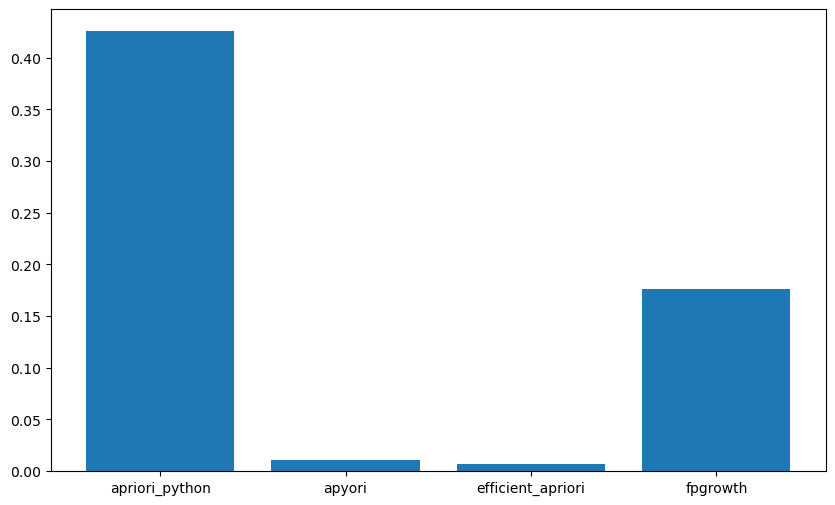

In [150]:
plt.bar(['apriori_python', 'apyori', 'efficient_apriori', 'fpgrowth'], times1)
plt.show()